<img src="twitterlogodown.png" width="50"  height="200" > 
<font color='skyblue'>
    
## **Análisis de Sentimientos de Twitter**
***
#### C. Contreras -  C. Vera
</font>


## I. PRELIMINARES

* **Descripción del problema y objetivos:** <br>
 En el problema corresponde a un trabajo de análisis de texto, en el que se debe extarer el sentimiento asociado a tweets de un dataset.
 
 Para ello, se pide un modelo que sea capaz de predecir si un tweet es de sentimiento positivo o negativo, en base al dataset 'text_emotion.csv', el cual contiene una gran variedad de tweets con su respectivo sentimiento.<br>
Para los casos de 'worry', 'sadness', 'hate', 'empty', 'boredom' y 'anger' se codificarán como **negativos**, 'happiness', 'love', 'surprice', 'fun', 'relief' y 'enthusiasm' como **positivos** y los que son **'neutral'** se clasificarán aleatoriamente como positivo o negativo.<br> Este corresponde a un problema de clasificación binaria, ya que mediante la recodificación de los sentimientos  el vector objetivo cuenta solo con 2 clases.<br> 
 
 
* **Cómo implementaremos la solución**<br> 
La metodologia consiste a grandes rasgos en la ingesta de datos, preprocesamiento, visualización y modelación.<br>
Lo que corresponde a lo siguiente:    
    
    - Importación y limpieza dataset
    - Visualización de valores perdidos
    - Visualización de frecuencias 
    - Análisis exploratorio y descrptivo del dataset
    - Recodificación de variables y preparación del vector objetivo
    - Preprocesamiento de texto usando la librería **nltk** para procesamiento de lenguaje natural.
        * transformación de tweets a lowercase y eliminación de caracteres especiales.
        * eliminación de *stopwords*
        * refinación de atributos mediante *lemantización* (reducción de variadas palabras con un tronco léxico común)
        
    - Generación de matriz de palabras  con el uso de *CountVectorizer* y *TfidfVectorizer* para reflejar la cantidad de ocurrencias de palabras en el texto 
                
    - Generacion de modelos de clasificación
    - Depuracion de modelos 
    - Generacion de nuevos modelos optimizados
    - Reporte de métricas de desempeño  
    - Selección de los 2 mejores modelos y serializarlos

* **Criterios de optimización y métricas de desempeño.**<br> 
Para la evaluación de los resultados y determinar cual es el mejor modelo se realizará lo siguiente:

     - Analisis de los 5 modelos  y sus predicciones ocupando las siguientes metricas:
        - Evaluación de la matriz de confusión,recall y accuracy

## II. ASPECTOS  COMPUTACIONALES
* **Librerías a utilizar**
   - Para visualzación de datos:
        - **numpy** versión 1.17.2
        - **pandas** versión 0.25.1
   - Para graficar:
        - **matplotlib.pyplot** versión 3.1.1
        - **seaborn** versión 0.9.0
   - Para algoritmos de clasificación: **sklearn** versión 0.21.3
   - Para el procesamiento de lenguaje natural simbólico, **nltk** versión 3.4.5
    - Python versión 3.7.3

   
* **modelos con una grilla de hiperparámetros tentativa (5)**

    1.Para Random Forest: <br> params = {'n_estimators': [50,100,150,200,250,500], 'max_depth':[None, 10,50,70]} <br>

    2.Para multinomial NB: <br>params = {'alpha': np.linspace(0,20,20)[1:]} <br>

    3.Para GradientBoostingClassifier: <br> params = {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [100,250,400,450,500,600,700],'subsample': [0.1, 0.5, 0.9]}

    4.Para AdaBoostClassifier: <br> params = {'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000]}

    5.Para LogisticRegression: <br> params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2']}



### III. ANÁLISIS EXPLORATORIO
* análisis descriptivo considerando el tipo de variables
* medidas univariadas/ frecuencias, datos perdidos y gráficos distributivos sobre las variables a analizar
* estrategia de preprocesamiento (datos perdidos, recodificaciones).

In [418]:
# librerias clasicas
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

#libreria sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix,classification_report, accuracy_score


#metodo para expresiones regulares
import re

# librerias para graficar
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


# Librerias para procesamiento de NLP
import nltk 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

#función anexa
def ale_neutro(sentimiento):
    ##función para asignar aleatoriamente un tweet neutro como positivo o negativo
    if sentimiento == 'neutral':
        if np.random.randint(2, size=1)[0] == 1:
            return 'Positiva'
        else:
            return 'Negativa'
    else:
        return sentimiento
    


[nltk_data] Downloading package stopwords to /home/camila/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/camila/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/camila/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [449]:
df = pd.read_csv('text_emotion.csv')

In [116]:
display(df.head())
display(df.info())
display(df.shape)

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


None

(40000, 4)

### Frecuencias de sentimientos

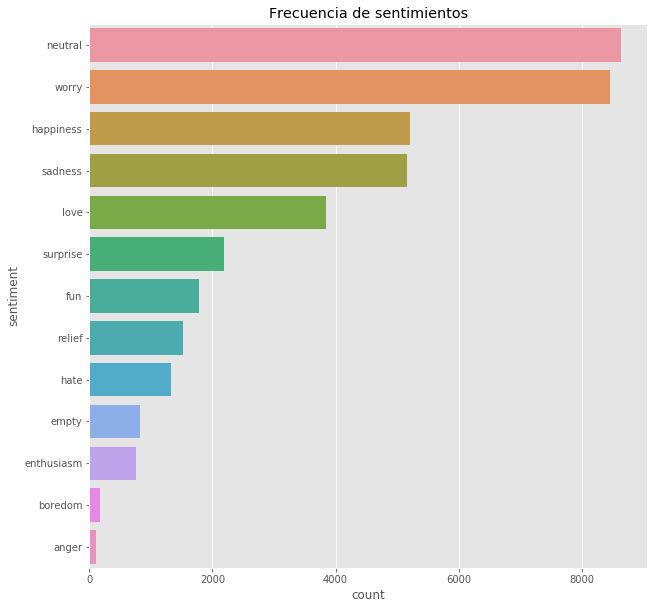

In [117]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["xtick.labelsize"] = 10
plt.title('Frecuencia de sentimientos')
sns.countplot(y= 'sentiment', order = df['sentiment'].value_counts().index, data = df)

In [51]:
df2 = pd.read_csv('text_emotion.csv')

In [118]:
display(print('Frecuencias de Sentimientos'))
display(round (df2.sentiment.value_counts('%')*100, 2))

Frecuencias de Sentimientos


None

neutral       21.60
worry         21.15
happiness     13.02
sadness       12.91
love           9.60
surprise       5.47
fun            4.44
relief         3.82
hate           3.31
empty          2.07
enthusiasm     1.90
boredom        0.45
anger          0.27
Name: sentiment, dtype: float64

VISUALIZACIÓN DE FRECUENCIAS DE SENTIMIENTOS CON WORDCLOUD


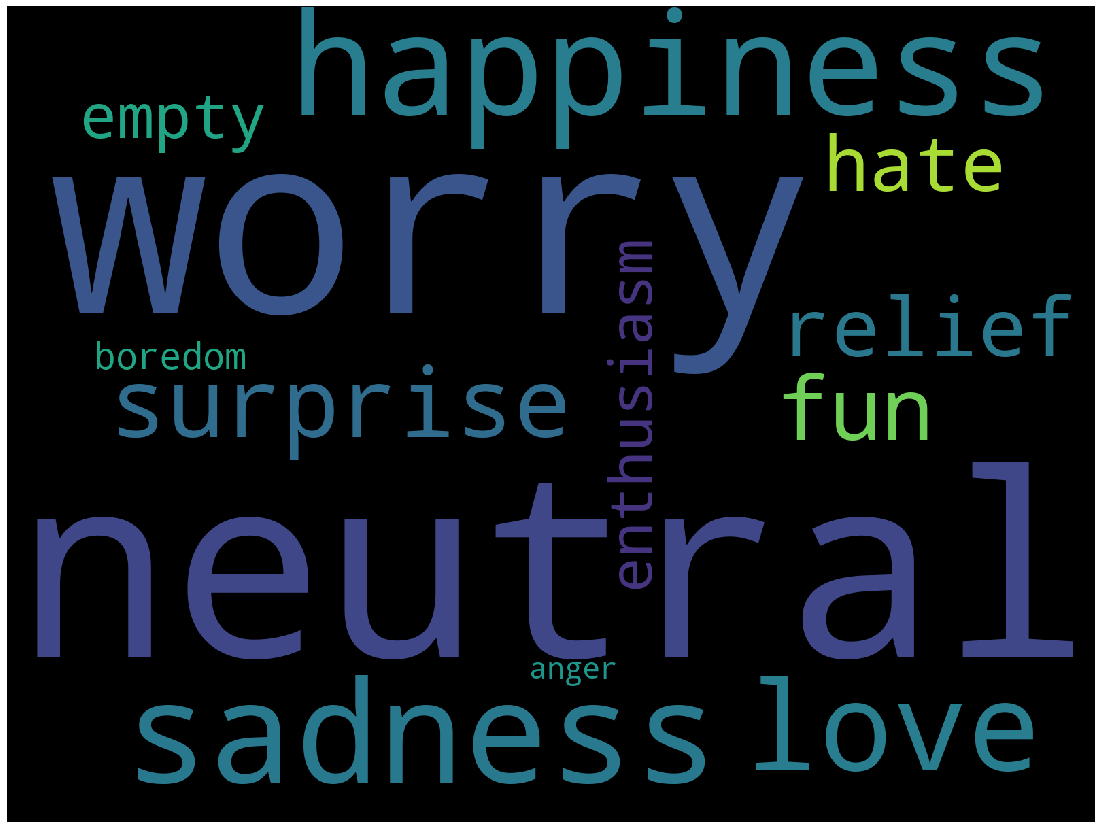

In [120]:
from wordcloud import WordCloud
cloud = WordCloud(width=1600, height=1200, collocations=False).generate(" ".join(df2['sentiment'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
print('VISUALIZACIÓN DE FRECUENCIAS DE SENTIMIENTOS CON WORDCLOUD')

Los sentimientos con mayor frecuencia corresponden a tweets neutros y preocupación, seguido por felicidad y tristeza, los menos frecuentes corresponden a ira y aburrimiento.

### Análisis descriptivo

#### Registros y tókens 

In [121]:
# registros y tokens 

registros = np.asarray(df['content'])
display(print("1. El número de registros totales es: ",registros.shape))

tokens = []
for i in registros:
    tokens.extend(i.split())
display(print("2. El número de tókens totales es: ",len(tokens)))

1. El número de registros totales es:  (40000,)


None

2. El número de tókens totales es:  528675


None

#### Palabras totales y tókens más frecuentes

In [122]:
# recuento de palabras
from collections import Counter #container that keeps track of how many times equivalent values are added

count_tokens = Counter(tokens)
display (print("- Cantidad de palabras totales: \t", len(count_tokens)))
display (print("- 30 tokens más frecuentes: \t",count_tokens.most_common(30)))

- Cantidad de palabras totales: 	 83297


None

- 30 tokens más frecuentes: 	 [('to', 14039), ('I', 12635), ('the', 12052), ('a', 9352), ('my', 7160), ('and', 6750), ('i', 6257), ('you', 5535), ('is', 5254), ('for', 5146), ('in', 5053), ('of', 4419), ('it', 4333), ('on', 3828), ('have', 3430), ('me', 3109), ('that', 3063), ('so', 3033), ('with', 2838), ('be', 2776), ('but', 2719), ('was', 2507), ('at', 2496), ("I'm", 2440), ('just', 2413), ('not', 2155), ('get', 1934), ('all', 1911), ('this', 1869), ('like', 1808)]


None

#### Boxplot descriptivo de los tweets por sentimiento

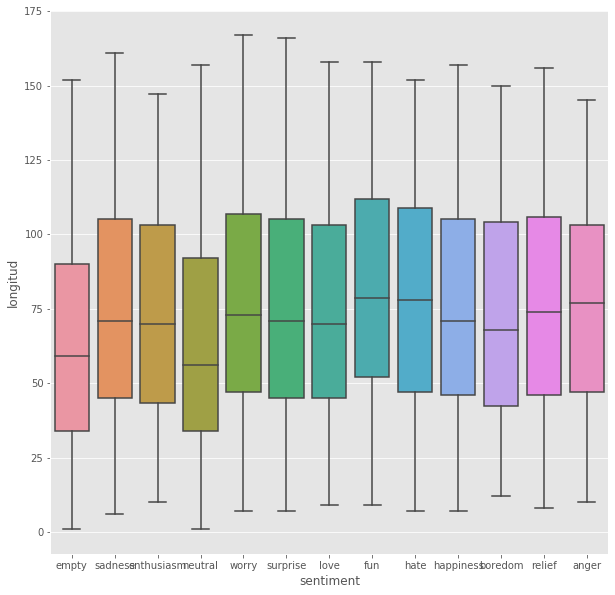

None

In [123]:
df['longitud'] = df['content'].str.len()

sns.boxplot(x= df['sentiment'], y='longitud', data=df)
plt.rcParams['figure.figsize']=(8,8)
display(plt.show())


La longitud de las palabras de los tweets es similar en ambos conjuntos, donde los tweets negativos son muy levemente más largos que los considerados positivos.

## IV. FEATURE ENGINEERING
* Recodificaciones y transformaciones

#### Binarización vector objetivo 'sentiment' y asignación aleatoria de los tweets neutros como positivos o negativos

#### Negativos, binarizado como 0

In [450]:
df['sentiment'] = np.where(df['sentiment'] == 'worry', 'Negativa',df['sentiment'])
df['sentiment'] = np.where(df['sentiment'] == 'sadness', 'Negativa', df['sentiment'])
df['sentiment'] = np.where(df['sentiment'] == 'hate', 'Negativa', df['sentiment'])
df['sentiment'] = np.where(df['sentiment'] == 'empty', 'Negativa', df['sentiment'])
df['sentiment'] = np.where(df['sentiment'] == 'boredom', 'Negativa', df['sentiment'])
df['sentiment'] = np.where(df['sentiment'] == 'anger', 'Negativa', df['sentiment'])

In [451]:
print("La cantidad de tweets con carga sentimental negativa es: ",
      len(df[df.sentiment== 'Negativa']),
'|',len(df[df.sentiment== 'Negativa'])/(len(df))*100,'%')

La cantidad de tweets con carga sentimental negativa es:  16063 | 40.1575 %


#### Positivos, binarizado como 1

In [452]:
df['sentiment'] = np.where(df['sentiment'] == 'happiness', 'Positiva', df['sentiment'])
df['sentiment'] = np.where(df['sentiment'] == 'love', 'Positiva', df['sentiment'])
df['sentiment'] = np.where(df['sentiment'] == 'surprise', 'Positiva', df['sentiment'])
df['sentiment'] = np.where(df['sentiment'] == 'fun', 'Positiva', df['sentiment'])
df['sentiment'] = np.where(df['sentiment'] == 'relief', 'Positiva', df['sentiment'])
df['sentiment'] = np.where(df['sentiment'] == 'enthusiasm', 'Positiva', df['sentiment'])

In [430]:
print("La cantidad de tweets con carga sentimental positiva es: ",
      len(df[df.sentiment== 'Positiva']),
      '|',len(df[df.sentiment== 'Positiva'])/(len(df))*100,'%')

La cantidad de tweets con carga sentimental positiva es:  15299 | 38.2475 %


In [424]:
print("La cantidad de tweets con carga sentimental neutral antes de la binarización es: ",len(df[df.sentiment== 'neutral']))

La cantidad de tweets con carga sentimental neutral antes de la binarización es:  8638


#### Frecuencia de la distribución de tweets positivos, negativos y neutrales 

Negativa    16063
Positiva    15299
neutral      8638
Name: sentiment, dtype: int64

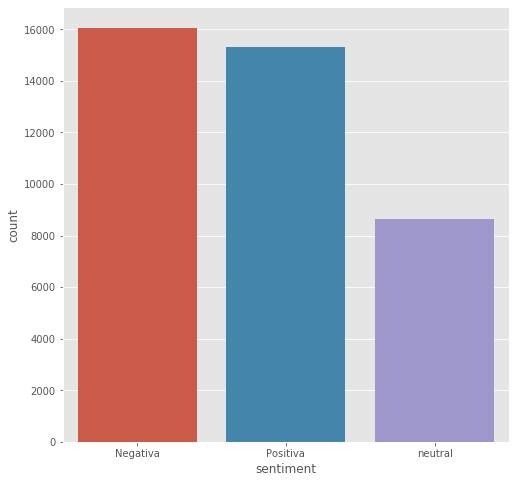

In [404]:
sns.countplot(x = 'sentiment', data = df)
df['sentiment'].value_counts()

#### Al agrupar los tweets en negativos y positivos, se observa que el 40.1575 % corresponden a tweets con carga sentimental negativa (16063 tweets) y  38.2475 % (15299 tweets) con carga positiva, por lo que se puede considerar que no existe un desbalance de clases drástico, el 21,595% (8638t tweets) corresponden a neutros, los cuales se distribuirán aleatoriamente como positivos o negativos.

#### Neutrales clasificados aleatoriamente

Asignación aleatoria de un tweet neutro como positivo o negativo

In [453]:
df['sentiment'] = df.sentiment.apply(ale_neutro)

In [436]:
print("La cantidad de tweets con carga sentimental neutral luego de la binarización es: ",len(df[df.sentiment== 'neutral']))

La cantidad de tweets con carga sentimental neutral luego de la binarización es:  0


Negativa    20403
Positiva    19597
Name: sentiment, dtype: int64

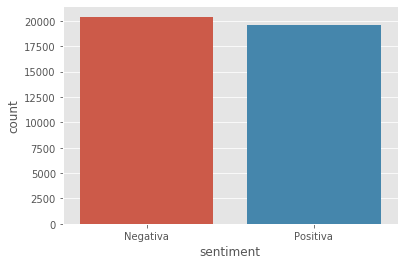

In [455]:
sns.countplot(x = 'sentiment', data = df)
df['sentiment'].value_counts()

#### Luego de añadir aleatoriamente los tweets neutrales, la distribución de frecuencias quedó con 20383 tweets negativos y 19617 positivos, mostrando un balance de clases muy parejo, con 806 tweets de diferencia entre ellos.

## Preprocesamiento de texto

Eliminación de caracteres especiales, URL, puntuación y transformación de tweets a lowercase.

In [456]:
processed_tweets = []

X = df.loc[:,'content'].values

for i in range(0, len(X)):
    #elimina palabras empezadas con @
    processed_tweet = re.sub(r'@+[a-zA-Z0-9]*', ' ', str(X[i]))
    #elimina paginas web http://...
    processed_tweet = re.sub(r'(http:)+[:/.~a-zA-Z0-9]*', ' ', processed_tweet)
     
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', processed_tweet)
    
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)
    
df['content'] = processed_tweets

### Lematización y eliminación de Stop Words

In [457]:
#lematizacion y stopwords
lemmatizer = WordNetLemmatizer()
textos = []

for text in df['content']:

    stop_words = set(stopwords.words('english'))
    
    word_list = nltk.word_tokenize(text)

    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list if not w in stop_words])

    textos.append(lemmatized_output)

df['content2'] = textos

In [84]:
print("Stopwords eliminadas: " + str(stop_words))

Stopwords eliminadas: {'yourselves', 'for', 'so', 'through', 'after', 'both', 'very', 'below', 'with', 'your', 'hadn', 'theirs', 'to', 'don', 'an', 'his', "should've", 'be', 'same', 'ain', 'doesn', 'just', "you'd", 'whom', "aren't", 'where', 'are', 'those', 'some', 'i', 'my', 'before', 'myself', 'what', 'has', 'about', 'against', 'over', 'more', 'needn', "won't", "wouldn't", 'mustn', 'any', 'will', 'her', 'am', 'why', 'won', 'aren', 'ours', 'itself', 'then', 'too', "couldn't", 'by', 'yours', 'than', 'into', 'd', 's', 'mightn', "you'll", 'above', 'such', "weren't", 'wouldn', "she's", 'him', 'these', 'were', 'once', 'on', 'out', 'couldn', 'you', 'this', "you're", 'yourself', 'have', "isn't", "mightn't", 'while', 'because', 'there', 'herself', 'most', 'up', 'them', 'they', 'is', 'a', 'here', 'not', 'y', 'ma', "don't", "didn't", 'me', "haven't", 'further', 'do', 'he', 'weren', "shouldn't", 'now', "hasn't", 'didn', 'and', 'our', 'hasn', "needn't", "doesn't", 'its', "you've", 'at', 'who', 's

### Generación de matrices 
Para que el modelo pueda procesar las palabras como datos numérico, se usará **TfidfVectorizer y CountVectorizer** como métodos para convertir datos de texto en vectores.

### a.  Generación de matriz de ocurrencias con CountVectorizer
CountVectorizer cuenta la cantidad de veces que aparece una palabra en el texto, lo que da como resultado un sesgo a favor de la palabra más frecuente. Esto termina ignorando palabras raras que podrían haber ayudado a procesar los datos de manera más eficiente.

In [458]:
from sklearn.feature_extraction.text import CountVectorizer

#1. instanciar un objeto CountVectorizer

count_vectorizer = CountVectorizer(analyzer='word',stop_words='english', max_features=10000, min_df = 2)
##vectorizer = CountVectorizer(analyzer='word', lowercase= True)
##bigramas: vectorizer_big = CountVectorizer(analyzer='word', ngram_range=(1,2), lowercase= True)

#2. fit y transform
X_train_countvec = count_vectorizer.fit_transform(df['content2'])


In [86]:
print('Matriz de vocabulario con CountVectorizer:', count_vectorizer.vocabulary_)

Matriz de vocabulario con CountVectorizer: {'know': 5128, 'listenin': 5341, 'bad': 984, 'habit': 4042, 'earlier': 2951, 'started': 8072, 'freakin': 3537, 'bed': 1094, 'headache': 4180, 'ughhhh': 9082, 'waitin': 9410, 'funeral': 3623, 'ceremony': 1720, 'gloomy': 3801, 'friday': 3566, 'want': 9440, 'hang': 4105, 'friend': 3569, 'soon': 7919, 'trade': 8820, 'houston': 4442, 'ticket': 8654, 'pinging': 6585, 'prom': 6862, 'bc': 1067, 'bf': 1161, 'like': 5308, 'sleep': 7812, 'im': 4574, 'thinking': 8604, 'old': 6260, 'married': 5558, 'damn': 2479, 'amp': 680, 'hmmm': 4329, 'love': 5437, 'miss': 5782, 'sorry': 7934, 'fall': 3253, 'asleep': 833, 'choked': 1884, 'retainer': 7296, 'ugh': 9079, 'beat': 1081, 'stupid': 8201, 'song': 7914, 'rude': 7421, 'watch': 9477, 'hill': 4303, 'london': 5392, 'realise': 7082, 'week': 9530, 'late': 5198, 'got': 3874, 'news': 6092, 'storm': 8134, 'electricity': 3010, 'gone': 3839, 'agreed': 562, 'sleepy': 7817, 'fail': 3240, 'lady': 5162, 'gaga': 3660, 'tweeted'

### b. Generación de matriz de ocurrencias con TfidfVectorizer + bigramas
TfidfVectorizer considera el peso general del texto de una palabra. Ayuda a lidiar con las palabras más frecuentes y al usarlo podemos penalizarlos. TfidfVectorizer pondera los recuentos de palabras en función de la frecuencia con la que aparecen en los textos.

In [459]:
from sklearn.feature_extraction.text import TfidfVectorizer
##1. instanciar un objeto Tfidf
tfidf_vectorizer=TfidfVectorizer(
        ngram_range=(1, 2), #  bigramas
        stop_words='english',
        max_df=0.4, # ignore terms that appear in more than 40% of documents
        min_df=4)
##2. fit y transform
X_train_tfidf =tfidf_vectorizer.fit_transform(df['content2'])


In [88]:
print('Matriz de vocabulario con TfidfVectorizer:', tfidf_vectorizer.vocabulary_)

Matriz de vocabulario con TfidfVectorizer: {'know': 4639, 'listenin': 4997, 'bad': 733, 'habit': 3655, 'earlier': 2446, 'started': 8161, 'freakin': 2981, 'bed': 850, 'headache': 3831, 'ughhhh': 9270, 'waitin': 9474, 'funeral': 3090, 'ceremony': 1374, 'gloomy': 3234, 'friday': 3012, 'want': 9508, 'hang': 3724, 'friend': 3020, 'soon': 7965, 'want hang': 9520, 'hang friend': 3725, 'trade': 9061, 'houston': 4160, 'ticket': 8779, 'pinging': 6615, 'prom': 6849, 'bc': 823, 'bf': 934, 'like': 4893, 'like friend': 4907, 'sleep': 7839, 'im': 4257, 'thinking': 8734, 'old': 6314, 'married': 5428, 'damn': 1910, 'amp': 442, 'im thinking': 4303, 'old friend': 6317, 'friend want': 3037, 'amp want': 471, 'hmmm': 3962, 'love': 5201, 'miss': 5594, 'love miss': 5230, 'sorry': 7996, 'fall': 2700, 'asleep': 591, 'fall asleep': 2701, 'ugh': 9262, 'beat': 836, 'stupid': 8284, 'song': 7948, 'rude': 7398, 'watch': 9589, 'hill': 3943, 'london': 5107, 'realise': 7076, 'week': 9659, 'late': 4749, 'week week': 9679

### V. MODELACIÓN
* solución analítica que aumente las métricas de desempeño. 
* Se solicitan por lo menos 5 modelos predictivos. 

#### División del dataset en subcojuntos de entrenamiento y test

CountVectorizer

In [460]:
X_train_countvec.shape

(40000, 10000)

In [461]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_train_countvec, df['sentiment'], test_size=0.3, random_state=1)

In [462]:
print(X_train_c.shape)
print(X_test_c.shape)
print(y_train_c.shape)
print(y_test_c.shape)

(28000, 10000)
(12000, 10000)
(28000,)
(12000,)


TfidfVectorizer

In [463]:
X_train_tfidf.shape

(40000, 10165)

In [464]:
X_train_t, X_test_t, y_train_t, y_test_t= train_test_split(X_train_tfidf, df['sentiment'], test_size=0.3, random_state=1)

In [465]:
print(X_train_t.shape)
print(X_test_t.shape)
print(y_train_t.shape)
print(y_test_t.shape)

(28000, 10165)
(12000, 10165)
(28000,)
(12000,)


### 1. RandomForest
Para Random Forest, se realizó una busqueda por grilla para encontrar los mejores hiperparamétros, los cuales fueron 'max_depth': 70,  'n_estimators': 500. Se probaron 50,100,150,200,250,500 estimadores, los cuales corresponden al numero de arboles que componen el bosque, sin embargo se optó por 50, ya que fue el mejor numero de estimadores encontrado por la búsqueda de grilla.

Busqueda de hiperparámetros y modelo con CountVectorizer

In [466]:
params = {'n_estimators': [50,100,150,200,250,500], 'max_depth':[None, 10,50,70]}

rf_model_gridcv_count = GridSearchCV(RandomForestClassifier(random_state = 1), params, cv=2, n_jobs=-1).fit(X_train_c,y_train_c)

In [467]:
rf_model_gridcv_count.best_params_

{'max_depth': 70, 'n_estimators': 150}

Métricas de desempeño con CountVectorizer

In [533]:
predictions_rf_c = rf_model_gridcv_count.predict(X_test_c)
print(classification_report(y_test_c,predictions))
print('accuracy: ', round(accuracy_score(y_test_c,predictions_rf_c),3))

              precision    recall  f1-score   support

    Negativa       0.68      0.70      0.69      6157
    Positiva       0.67      0.65      0.66      5843

    accuracy                           0.67     12000
   macro avg       0.67      0.67      0.67     12000
weighted avg       0.67      0.67      0.67     12000

accuracy:  0.669


Matriz de confusión

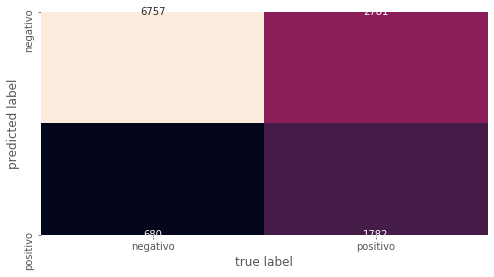

In [344]:
leyenda=['negativo','positivo']
mat = confusion_matrix(y_test_c, predictions)
sns.heatmap(
    mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=leyenda, 
    yticklabels=leyenda
)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Busqueda de hiperparámetros y modelo con TfidfVectorizer

In [469]:
params = {'n_estimators': [50,100,150,200,250,500], 'max_depth':[None, 10,50,70]}

rf_model_gridcv_tfidf = GridSearchCV(RandomForestClassifier(random_state = 1), params, cv=2, n_jobs=-1).fit(X_train_t,y_train_t)

In [470]:
rf_model_gridcv_tfidf.best_params_

{'max_depth': 70, 'n_estimators': 250}

Métricas de desempeño con TfidfVectorizer

In [532]:
predictions_rf_t = rf_model_gridcv_tfidf.predict(X_test_t)
print(classification_report(y_test_t,predictions))
print('accuracy: ', round(accuracy_score(y_test_t,predictions_rf_t),3))

              precision    recall  f1-score   support

    Negativa       0.68      0.70      0.69      6157
    Positiva       0.67      0.65      0.66      5843

    accuracy                           0.67     12000
   macro avg       0.67      0.67      0.67     12000
weighted avg       0.67      0.67      0.67     12000

accuracy:  0.67


### 2. MultinomialNB
Para el algoritmo de Multinomial Naive Bayes se realizó una búsqueda de hiperparámetros con GridSearch para alpha, se obtuvo los siguiente {'alpha': 14.736842105263158}

In [472]:
params = {'alpha': np.linspace(0,20,20)[1:]}

nb_gridcv = GridSearchCV(MultinomialNB(), params, cv=10, n_jobs=-1).fit(X_train_c,y_train_c)

In [473]:
nb_gridcv.best_params_

{'alpha': 14.736842105263158}

In [531]:
predictions_nb = nb_gridcv.predict(X_test_c)
print(classification_report(y_test_c,predictions))
print('accuracy: ', round(accuracy_score(y_test_c,predictions_nb),3))

              precision    recall  f1-score   support

    Negativa       0.68      0.70      0.69      6157
    Positiva       0.67      0.65      0.66      5843

    accuracy                           0.67     12000
   macro avg       0.67      0.67      0.67     12000
weighted avg       0.67      0.67      0.67     12000

accuracy:  0.674


### 3. GradientBoostingClassifier
Para el algoritmo de ensamble GradientBoost,  se realizó una busqueda de hiperparametros  para obtener el mejor número de árboles estimadores, de learning rate y de submuestras, los cuales fueron los siguientes: learning_rate= 0.1, n_estimators= 700, subsample= 0.9

In [475]:
params = {'learning_rate': [0.01, 0.1, 1, 10],'n_estimators': [100,250,400,450,500,600,700],'subsample': [0.1, 0.5, 0.9]}

gradient_boost_gridcv = GridSearchCV(GradientBoostingClassifier(random_state = 1), params, cv=5, n_jobs=-1).fit(X_train_c,y_train_c)


In [481]:
gradient_boost_gridcv.best_params_

{'learning_rate': 0.1, 'n_estimators': 700, 'subsample': 0.9}

In [477]:
#gradientboost_model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 600, subsample = 0.9, random_state=1).fit(X_train,y_train)

In [530]:
y_hat_gradient = gradient_boost_gridcv.predict(X_test_c)
print(classification_report(y_test_c, y_hat))
print('accuracy: ', round(accuracy_score(y_test_c,y_hat_gradient),3))

              precision    recall  f1-score   support

    Negativa       0.67      0.73      0.70      6157
    Positiva       0.69      0.62      0.65      5843

    accuracy                           0.68     12000
   macro avg       0.68      0.68      0.68     12000
weighted avg       0.68      0.68      0.68     12000

accuracy:  0.675


### 4. AdaBoostClassifier
Para el algoritmo de ensamble AdaBoost, se realizó una busqueda por grilla para encontrar los mejores hiperparamétros, los cuales fueron 'learning_rate': 0.5, 'n_estimators': 500

In [480]:
params = {'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000]}

adaboost_gridcv = GridSearchCV(AdaBoostClassifier(random_state = 1), params, cv=2, n_jobs=-1).fit(X_train_c,y_train_c)

In [483]:
adaboost_gridcv.best_params_

{'learning_rate': 0.5, 'n_estimators': 500}

In [69]:
#adaboost = AdaBoostClassifier(learning_rate= 0.5, n_estimators= 500,random_state = 1).fit(X_train,y_train)

In [529]:
y_hat_ada = adaboost_gridcv.predict(X_test_c)
print(classification_report(y_test_c, y_hat))
print('accuracy: ', round(accuracy_score(y_test_c,y_hat_ada),3))

              precision    recall  f1-score   support

    Negativa       0.67      0.73      0.70      6157
    Positiva       0.69      0.62      0.65      5843

    accuracy                           0.68     12000
   macro avg       0.68      0.68      0.68     12000
weighted avg       0.68      0.68      0.68     12000

accuracy:  0.674


### 5. LogisticRegression
Para el algoritmo de Regresión Logística se realizó una búsqueda de hiperparámetros con GridSearch para C y penalty, se obtuvieron los siguientes {'C': 0.1, 'penalty': 'l2'}

In [489]:
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2']}

logistic_gridcv = GridSearchCV(LogisticRegression(random_state = 1), params, cv=5, n_jobs=-1).fit(X_train_c,y_train_c)


In [486]:
logistic_gridcv.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [67]:
#logistic = LogisticRegression(C= 0.1, penalty= 'l2',random_state = 1).fit(X_train,y_train)

In [528]:
y_hat_log = logistic_gridcv.predict(X_test_c)
print(classification_report(y_test_c, y_hat))
print('accuracy: ', round(accuracy_score(y_test_c,y_hat_log),3))

              precision    recall  f1-score   support

    Negativa       0.67      0.73      0.70      6157
    Positiva       0.69      0.62      0.65      5843

    accuracy                           0.68     12000
   macro avg       0.68      0.68      0.68     12000
weighted avg       0.68      0.68      0.68     12000

accuracy:  0.679


### Elección de mejor modelo

Los resultados en los 5 tipos de modelos fueron muy similares entre sí,tanto los algoritmos de ensamble, como regresión logística arrojaron un **accuracy** cercano a **0.67**.
En el caso de Random Forest, no se encontró mayor ventaja en el uso de TfidVectorizer (bigrams) por sobre CountVectorizer, arrojando un accuracy de 0.67 y  0.669 respectivamente. <br>
Los modelos escogidos para la serialización corresponden a los que el promedio de recall y accuracy obtengan mejores resultados.


In [537]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

promedios = {'Random_forest': [recall_score(y_test_c,rf_model_gridcv_count.predict(X_test_c),average = 'macro').round(3),
             accuracy_score(y_test_c,rf_model_gridcv_count.predict(X_test_c)).round(3)],
            'MultinomialNB': [recall_score(y_test_c,nb_gridcv.predict(X_test_c),average = 'macro').round(3),
             accuracy_score(y_test_c,nb_gridcv.predict(X_test_c)).round(3)],
             'GradientBoostingClassifier':[recall_score(y_test_c,gradient_boost_gridcv.predict(X_test_c),average = 'macro').round(3),
             accuracy_score(y_test_c,gradient_boost_gridcv.predict(X_test_c)).round(3)],
            'AdaBoostClassifier':[recall_score(y_test_c,adaboost_gridcv.predict(X_test_c),average = 'macro').round(3),
             accuracy_score(y_test_c,adaboost_gridcv.predict(X_test_c)).round(3)],
            'LogisticRegression':[recall_score(y_test_c,logistic_gridcv.predict(X_test_c),average = 'macro').round(3),
             accuracy_score(y_test_c,logistic_gridcv.predict(X_test_c)).round(3)]
            }
df_promedios = pd.DataFrame(data = promedios, index = ['Recall','Accuracy'])

In [547]:
df_promedios.head()

,Random_forest,MultinomialNB,GradientBoostingClassifier,AdaBoostClassifier,LogisticRegression
Recall,0.665,0.673,0.672,0.671,0.677
Accuracy,0.669,0.674,0.675,0.674,0.679


In [546]:
print('Promedio de métricas de desempeño Recall y Accuracy')
df_promedios.T.sort_values(by ='Accuracy',axis = 0, ascending=False)

Promedio de métricas de desempeño Recall y Accuracy


,Recall,Accuracy
LogisticRegression,0.677,0.679
GradientBoostingClassifier,0.672,0.675
MultinomialNB,0.673,0.674
AdaBoostClassifier,0.671,0.674
Random_forest,0.665,0.669


Se calculó el promedio de Recall de cada modelo y se relacionó con su Accuracy, las mejores métricas corresponden a los algoritmos de Logistic Reression, con un accuracy de 0.679 y promedio de recall 0.677 y  en segundo lugar, el algoritmo de ensamble: GradientBoostingClassifier con un accuracy de 0.675 y promedio de recall 0.672.

### Serialización de modelos

In [549]:
from  joblib import load,dump

1.LogisticRegression

In [565]:
dump(logistic_gridcv.best_estimator_,'contreras_vera-LogisticRegression.joblib')

['contreras_vera-LogisticRegression.joblib']

In [566]:
modelo1 = load('contreras_vera-LogisticRegression.joblib')

In [561]:
#modelo1.get_params()

2.GradientBoostingClassifier

In [563]:
dump(gradient_boost_gridcv.best_estimator_,'contreras_vera-GradientBoostingClassifier.joblib')

['contreras_vera-GradientBoostingClassifier.joblib']

In [568]:
modelo2 = load('contreras_vera-GradientBoostingClassifier.joblib')

In [560]:
#modelo2.get_params()
